In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [37]:
runpath = '/Users/spartee/Dropbox/Professional/Cray/399-Thesis/3yr_runs_with_tracer/'
runs = ["1-4_deg_1000", "1-4_deg_11000", "1-4_deg_21000", "1-4_deg_31000", "1-4_deg_41000", "1-4_deg_51000",
        "1-2_deg_1000", "1-2_deg_11000", "1-2_deg_21000", "1-2_deg_31000", "1-2_deg_41000", "1-2_deg_51000"]
run_data = {}
for run in runs:
    run_data[run] = xr.open_dataset(runpath + run + '/ocean_mean_month.nc',decode_times=False)

# to calculate variable length
data = run_data["1-4_deg_31000"]

# Define list of 3d variables (nz,nlat,nlon) to be used to construct tensor
state_vars_3d = ['dye001',
                 'dye002',
                 'dye003',
                 'sfn']
nvar_3d = len(state_vars_3d)

# Placeholder list for 2d variables (nlat,nlon)
state_vars_2d = []
nvar_2d = len(state_vars_2d)

# Store dimension lengths of data
nk = len(data.zl)
nlat = data.yh.size
nlon = data.xh.size
npts = nlat*nlon
npts_low = 1760

# Define indices for time averaging
t0 = 12
tf = -1

In [38]:
# Calculate zonal streamfunction
for run in runs:
    data = run_data[run]
    run_data[run]["sfn"] = data.vh.cumsum('xh')

In [40]:
# Create arrays which will become the state tensor
state_tensors = dict.fromkeys(run_data.keys())
for run in runs:
    if run.startswith("1-2"):
        state_tensors[run] = np.zeros((npts_low,nvar_3d * nk+nvar_2d*1))
    else:
        state_tensors[run] = np.zeros((npts,nvar_3d * nk+nvar_2d*1))

In [41]:
for run, state_tensor in state_tensors.items():
    # Loop over all state variables to create state tensor
    data = run_data[run]
    ncol = 0
    for var in state_vars_3d:
        for k in range(0,nk):
            # Average the data in time (note that )
            if run.startswith("1-2"):
                state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:,:].mean('time')[k,:,:]).reshape(npts_low)
            else:
                state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:,:].mean('time')[k,:,:]).reshape(npts)
            ncol += 1
      


In [42]:
state_tensors["1-2_deg_1000"]

array([[ 5.86165078e-02,  0.00000000e+00,  3.39019954e-01, ...,
         0.00000000e+00, -1.10063025e+06, -2.33899546e-17],
       [ 5.93723506e-02,  0.00000000e+00,  3.40568125e-01, ...,
         0.00000000e+00, -1.87685350e+06, -3.22176592e-17],
       [ 8.53611082e-02,  0.00000000e+00,  3.32580775e-01, ...,
         0.00000000e+00,  2.06843250e+05, -1.60289504e-17],
       ...,
       [ 8.78810691e-24,  0.00000000e+00,  9.83998243e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.41835205e-30,  0.00000000e+00,  5.20011228e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.63544504e-35,  0.00000000e+00,  2.90551386e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

1-4_deg_1000


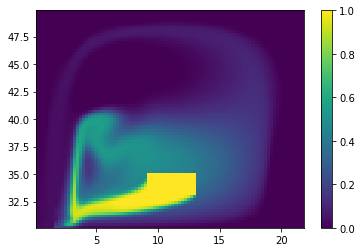

1-4_deg_11000


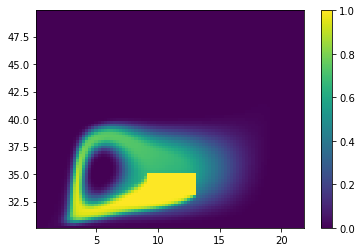

1-4_deg_21000


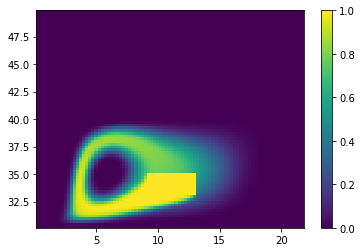

1-4_deg_31000


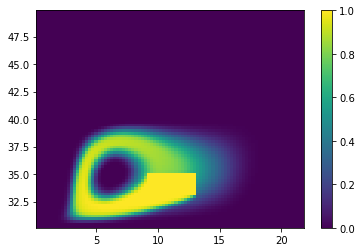

1-4_deg_41000


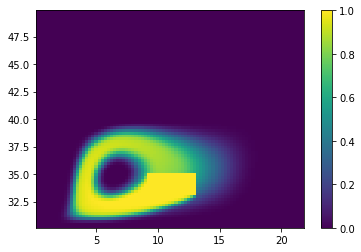

1-4_deg_51000


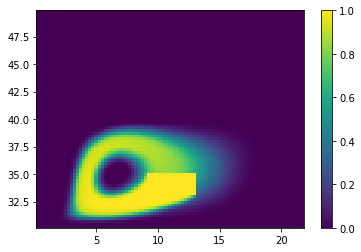

1-2_deg_1000


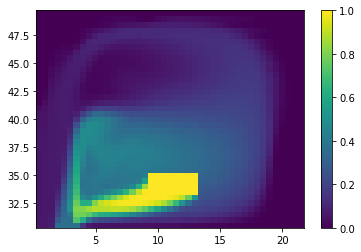

1-2_deg_11000


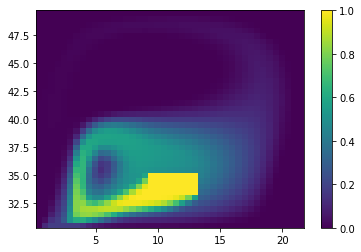

1-2_deg_21000


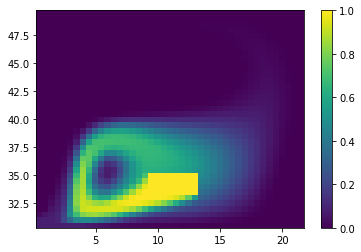

1-2_deg_31000


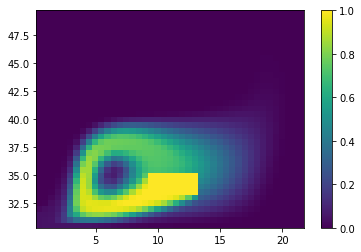

1-2_deg_41000


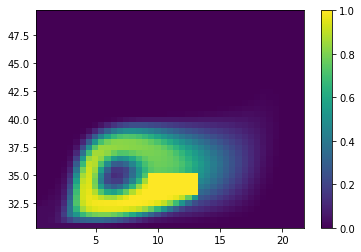

1-2_deg_51000


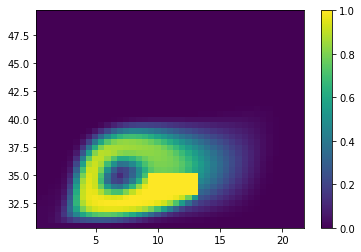

In [45]:
# Note that we undo the reshape operation to get the data back on the original horizontal grid
for run, state_tensor in state_tensors.items():
    data = run_data[run]
    if run.startswith("1-2"):
        tmp = state_tensor[:,0].reshape( (40, 44) )
        plt.pcolormesh(data.xh,data.yh,tmp)
        print(run)
        plt.colorbar()
        plt.show()
    else:
        tmp = state_tensor[:,0].reshape( (nlat, nlon) )
        plt.pcolormesh(data.xh,data.yh,tmp)
        print(run)
        plt.colorbar()
        plt.show()

In [19]:
import pandas as pd

In [30]:
for run, state_tensor in state_tensors.items():
    df = pd.DataFrame(state_tensor)
    print(run)
    print(df.describe())

1-4_deg_1000
                  0            1            2            3            4  \
count  7.040000e+03  7040.000000  7040.000000  7040.000000  7040.000000   
mean   1.608501e-01     0.064919     0.310359     0.047229     0.244204   
std    2.402118e-01     0.224667     0.324720     0.201225     0.273283   
min    0.000000e+00     0.000000     0.000000     0.000000     0.000000   
25%    9.840304e-07     0.000000     0.014436     0.000000     0.003231   
50%    4.527832e-02     0.000000     0.195496     0.000000     0.143292   
75%    2.278901e-01     0.000000     0.523568     0.000000     0.426331   
max    1.000000e+00     1.000000     1.000000     1.000000     1.000000   

                 5             6             7  
count  7040.000000  7.040000e+03  7.040000e+03  
mean      0.022912  6.578345e+05  3.552095e+04  
std       0.144035  6.464557e+06  7.054109e+04  
min       0.000000 -1.890846e+07 -1.770385e+05  
25%       0.000000 -1.140604e+06 -3.667546e-18  
50%       0.00000

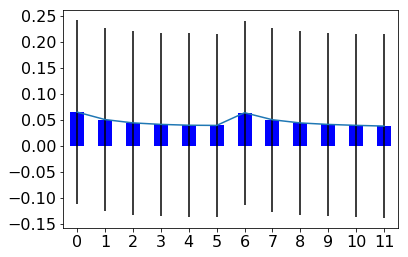

In [46]:

means = []
stds = []
for run, state_tensor in state_tensors.items():
    mean = state_tensor[:,1].mean()
    std = state_tensor[:, 1].std()
    means.append(mean)
    stds.append(mean)
    
df_means = pd.Series(means)
df_stds = pd.Series(stds)
    
p = df_means.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std)
s = df_means.plot()

In [47]:
for run, state_tensor in state_tensors.items():
    print(run)
    col_means = []
    col_stds = []
    for col in range(0, 4):
        col_means.append(state_tensor[:,col].mean())
        col_stds.append(state_tensor[:,col].std())
    print(col_means)
    print(col_stds)
        

1-4_deg_1000
[0.1608501251810112, 0.06491885509410096, 0.310359445777766, 0.04722895916996398]
[0.24019475203168536, 0.22465126280357867, 0.3246968559440109, 0.20121102212428693]
1-4_deg_11000
[0.12847288876209864, 0.050456010335591585, 0.29687965964587604, 0.041181286667452806]
[0.2641053893193146, 0.20671666504906233, 0.33191380746401006, 0.18875843871513187]
1-4_deg_21000
[0.1246319250781461, 0.04405714947464009, 0.31814862720804676, 0.03978268789648085]
[0.2723453782961845, 0.19504892987704342, 0.33629347720274133, 0.18611698861926643]
1-4_deg_31000
[0.12749459414731587, 0.04117748881236186, 0.3246364877090225, 0.03858456454696707]
[0.28200530395153495, 0.1892079831826376, 0.33590246131361046, 0.1838899863261369]
1-4_deg_41000
[0.13034673847912748, 0.03956262964154563, 0.32404552988968116, 0.03790758253053124]
[0.2886718872144102, 0.18573851072350525, 0.33582204245115765, 0.18247210692664648]
1-4_deg_51000
[0.1312192856464183, 0.03918510721665998, 0.32484050421514543, 0.03792642963